##### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### All the columns are non-null, all the faeture are float datatype, target variable in int datatype

### EDA

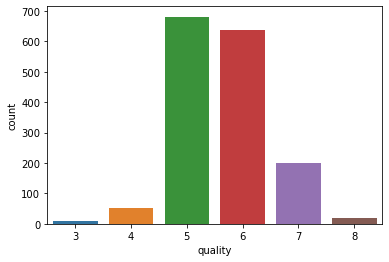

In [4]:
sns.countplot(df['quality'])
plt.show()

#### Most of the wines comes under quality 5,followed by quality 6, quality 7 respectively. Quality 3 is the least followed by quality 8

#### Lets plot for Feature vs Target variable

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

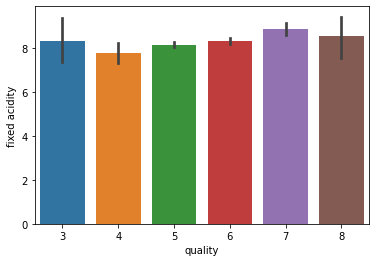

In [5]:
sns.barplot(x=df['quality'],y=df['fixed acidity'])

#### From the graph it is clear that fixed acidity doesn't have a major role in the quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

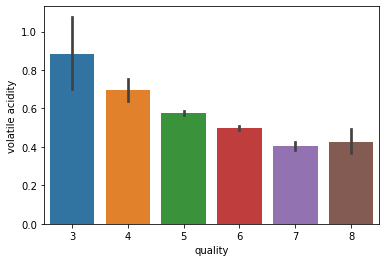

In [6]:
sns.barplot(x=df['quality'],y=df['volatile acidity'])

#### As the volatile acidity decreases wine quality increases

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

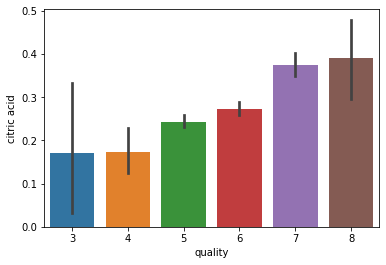

In [7]:
sns.barplot(x=df['quality'],y=df['citric acid'])

#### As citric acid increases wine quality also increases

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

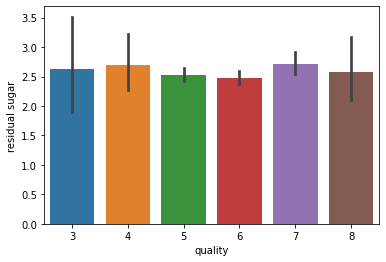

In [8]:
sns.barplot(x=df['quality'],y=df['residual sugar'])

#### Residual sugar has no such importance for deciding the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

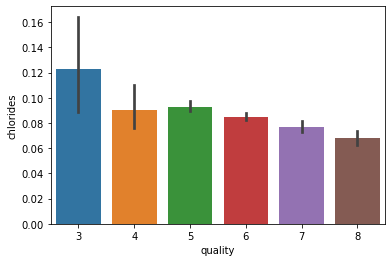

In [9]:
sns.barplot(x=df['quality'],y=df['chlorides'])

#### As the chloride content decrease the wine quality decrease

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

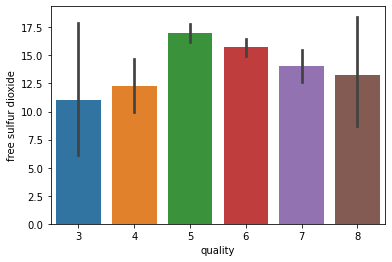

In [10]:
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'])

#### Free sulphur dioxide doesn't play a major role in determining the wine quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

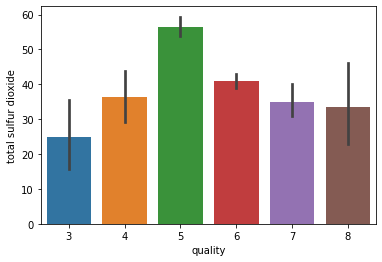

In [11]:
sns.barplot(x=df['quality'],y=df['total sulfur dioxide'])

#### Total sulfur dioxide doesn't play a crucial role in the quality of wine

<AxesSubplot:xlabel='quality', ylabel='density'>

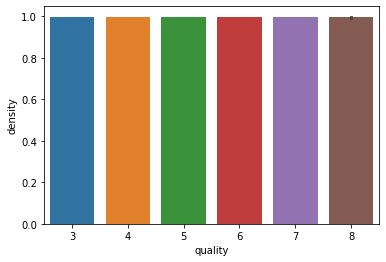

In [12]:
sns.barplot(x=df['quality'],y=df['density'])

#### Density remains same for all quality of wines

<AxesSubplot:xlabel='quality', ylabel='pH'>

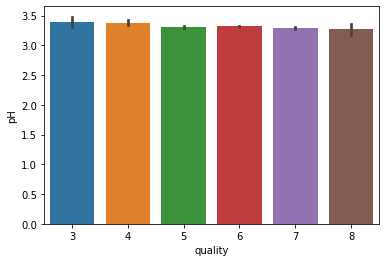

In [13]:
sns.barplot(x=df['quality'],y=df['pH'])

#### pH value is more or less same for all wine quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

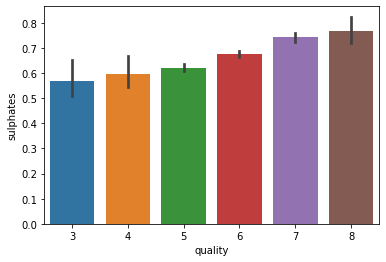

In [14]:
sns.barplot(x=df['quality'],y=df['sulphates'])

#### As the presence of sulphate increase the wine quality also increases

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

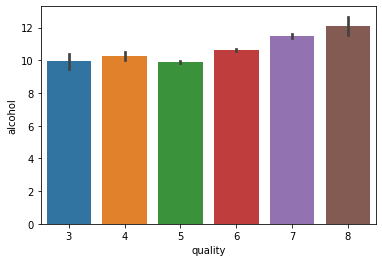

In [15]:
sns.barplot(x=df['quality'],y=df['alcohol'])

#### Alcohol content remains almost same for all quality

#### Checking Correlation

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Alcohol is having the highest correlation with quality and residual sugar is having the lowest correlation followed by free sulphur dioxide and pH

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### From the description it is clear that residual sugar,free sulphur dioxide and total sulphur dioxide have some outliers

#### Checking for outliers

In [18]:
df.shape

(1599, 12)

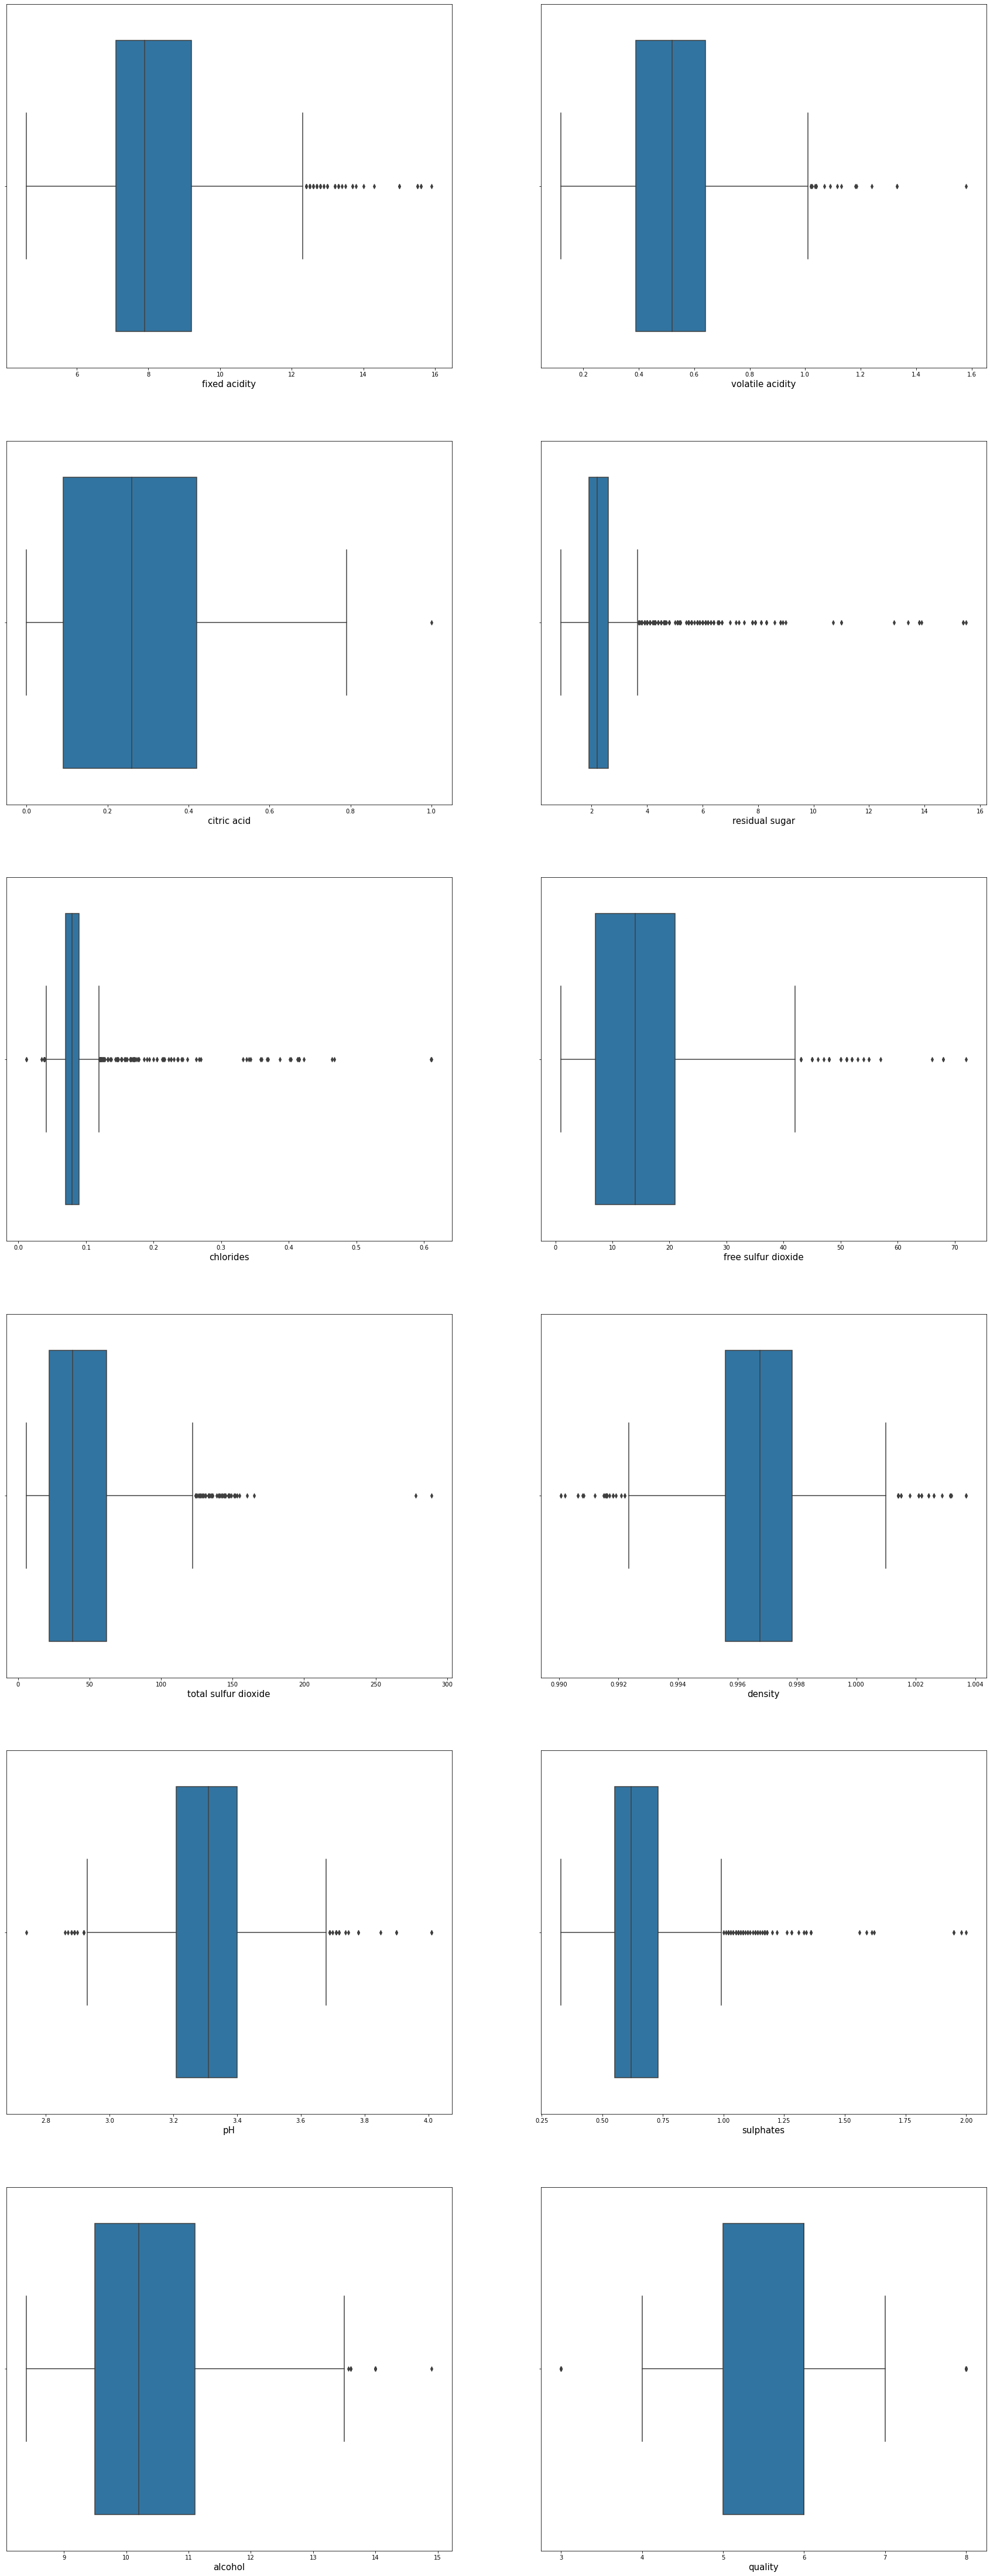

In [19]:
plt.figure(figsize=(30,80))
gr = 1
for column in df:
    if gr<=12:
        ax = plt.subplot(6,2,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Clearly shows that outliers exists in all columns

#### Checking for skewness

In [20]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### All columns are skewed except citric acid,density,pH and quality

#### Checking for Normal Distribution

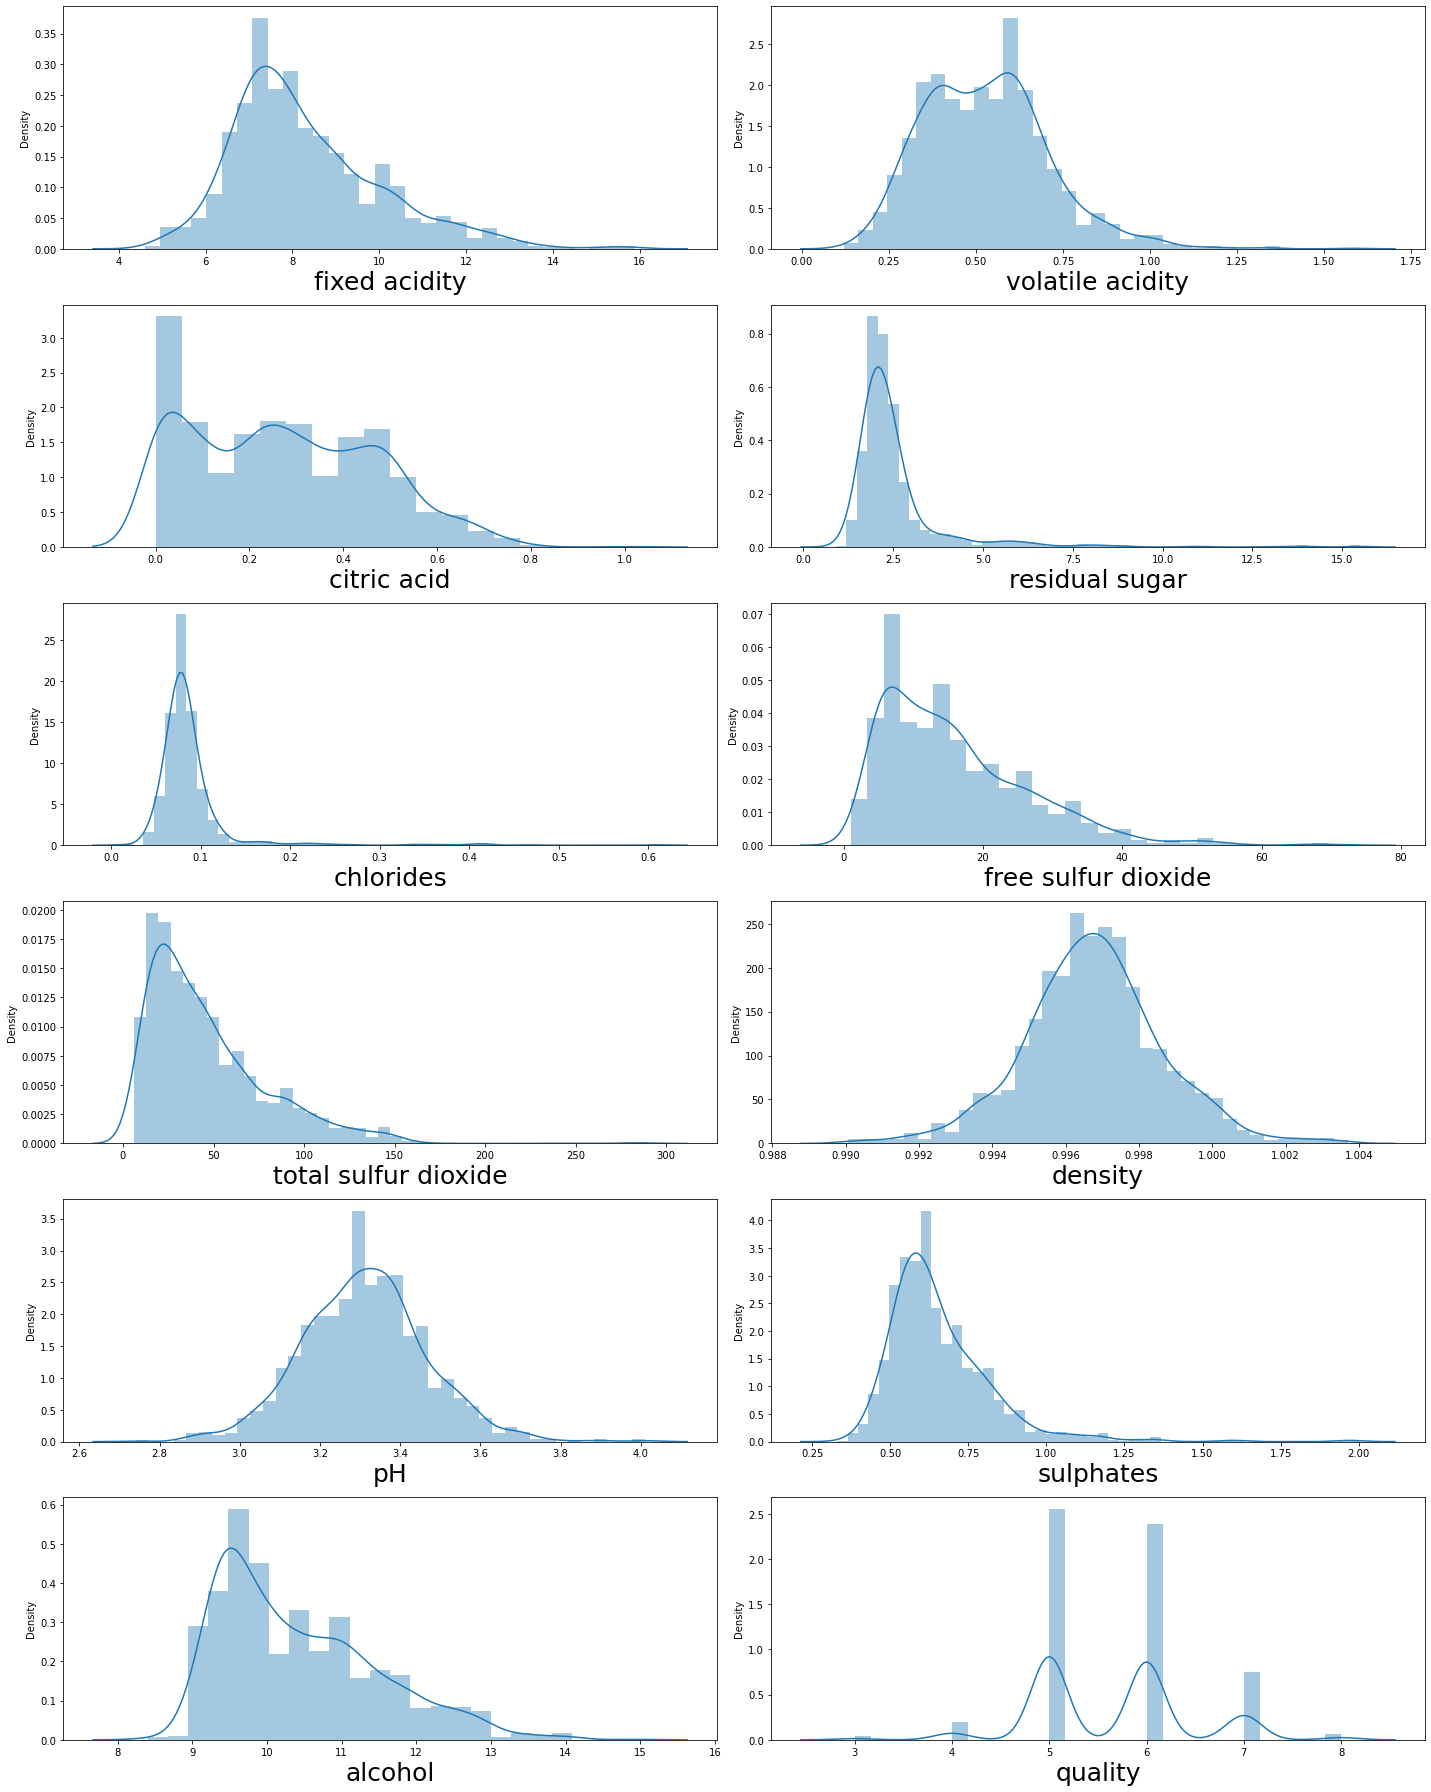

In [21]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### All the variables are skewed

### Data Cleaning

#### Lets drop residual sugar,free-sulphur dioxide,total sulphur dioxide as they have little to no contibution for wine quality and they are heavily skewed

In [22]:
df_drop = pd.DataFrame([["Residual sugar","0.013","No","4.54"],["free sulphur dioxide","-0.05","No","1.25"],["total sulphur dioxide","-0.18","No","1.51"]],columns=["features","Correlation","Normalized","Skewness"])
df_drop

,features,Correlation,Normalized,Skewness
0,Residual sugar,0.013,No,4.54
1,free sulphur dioxide,-0.05,No,1.25
2,total sulphur dioxide,-0.18,No,1.51


In [23]:
df = df.drop(columns=['residual sugar','free sulfur dioxide','total sulfur dioxide'],axis = 1)
df.head(2)

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,0.076,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,0.098,0.9968,3.20,0.68,9.8,5


#### Removing outliers from the dataset

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (1599, 9)
[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]
Row numbers :  [  13   17   17   19   38   42   43   45   81   81   83   86   88   91
   92   95  106  106  120  126  127  142  144  147  151  151  151  151
  169  169  181  199  226  226  240  243  244  258  258  281  291  339
  340  347  374  381  391  442  442  451  459  467  480  517  544  554
  554  555  555  557  557  568  588  608  614  639  652  652  672  690
  690  692  692  695  723  724  730  754  776  777  795  821  832  836
  837  889  899 1017 1018 1051 1051 1111 1114 1165 1260 1269 1269 1270
 1270 1288 1289 1299 

#### Data Loss

In [25]:
loss = (1599-1498)/1599*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  6.316447779862414 % of data


### Converting the quality column as 1(for good) and 0(for bad)

In [26]:
df1['quality'].value_counts()

5    642
6    602
7    190
4     48
8     16
Name: quality, dtype: int64

In [27]:
df1['quality'] = pd.cut(df1['quality'],bins=(2,6.5,8),labels=[0,1])
df1.head(5)
#OR we can use following method as well
#df['quality'] = df['quality'].replace(to_replace=[7,8,9,10],value='1')
#df['quality'] = df['quality'].replace(to_replace=[3,4,5,6],value='0')

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,0


In [28]:
df1['quality'].value_counts()

0    1292
1     206
Name: quality, dtype: int64

#### Data is imbalanced

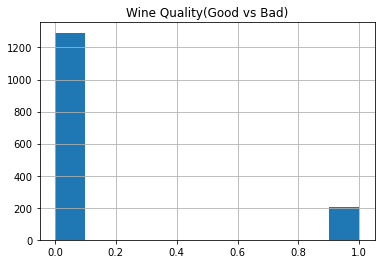

In [29]:
df1['quality'].hist(grid=True)
plt.title("Wine Quality(Good vs Bad)")
plt.show()

#### Splitting dataset into x and y(Features and target)

In [30]:
x = df1.drop("quality",axis=1)
y = df1["quality"]

#### Removing skewness

In [31]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.45465301,  1.046008  , -1.52973808, ...,  1.36585646,
        -0.58018753, -1.11115266],
       [-0.15743035,  1.9097606 , -1.52973808, ..., -0.8150375 ,
         0.45747028, -0.52182055],
       [-0.15743035,  1.34686091, -1.24942859, ..., -0.37860235,
         0.22716375, -0.52182055],
       ...,
       [-1.43964358, -0.00775892, -0.66810242, ...,  0.75110881,
         0.93299163,  0.74718319],
       [-1.87554079,  0.75762283, -0.72960226, ...,  1.76781093,
         0.6712317 , -0.02682619],
       [-1.7619043 , -1.32528499,  1.07236417, ...,  0.54294932,
         0.30586705,  0.74718319]])

#### Lets check the skewness

In [32]:
x_new = pd.DataFrame(x_new,columns=x.columns)

In [33]:
x_new.skew()

fixed acidity       0.019646
volatile acidity    0.004699
citric acid         0.018321
chlorides          -0.107811
density            -0.000826
pH                 -0.000077
sulphates           0.023364
alcohol             0.117879
dtype: float64

#### Now the skewness is removed

#### Since the data is imbalanced lets make it balanced by oversampling

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [36]:
y_over.value_counts()

1    1292
0    1292
Name: quality, dtype: int64

#### Lets scale the data

In [37]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_over)

#### Finding the best random state

In [38]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8668730650154799 when 86 is the random state


#### Splitting the dataset into train and test

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = 86)

### MODEL TRAINING

#### i) Logistic Regression

In [42]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8668730650154799
Confusion Matrix 
 [[284  47]
 [ 39 276]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       331
           1       0.85      0.88      0.87       315

    accuracy                           0.87       646
   macro avg       0.87      0.87      0.87       646
weighted avg       0.87      0.87      0.87       646



#### Logistic regression gives an accuracy of 86.69%

#### ii) Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.891640866873065
Confusion Matrix 
 [[291  40]
 [ 30 285]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       331
           1       0.88      0.90      0.89       315

    accuracy                           0.89       646
   macro avg       0.89      0.89      0.89       646
weighted avg       0.89      0.89      0.89       646



#### DecisionTree Classifier gives an accuracy of 89.16%

#### iii) Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.9458204334365325
Confusion Matrix 
 [[310  21]
 [ 14 301]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       331
           1       0.93      0.96      0.95       315

    accuracy                           0.95       646
   macro avg       0.95      0.95      0.95       646
weighted avg       0.95      0.95      0.95       646



#### Random Forest Classifier gives an accuracy of 94.58% 

#### iv) SVC

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8839009287925697
Confusion Matrix 
 [[289  42]
 [ 33 282]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       331
           1       0.87      0.90      0.88       315

    accuracy                           0.88       646
   macro avg       0.88      0.88      0.88       646
weighted avg       0.88      0.88      0.88       646



#### SVC gives an accuracy of 88.39%

#### v) XGBoost Classifier

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[08:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.9396284829721362
Confusion Matrix 
 [[307  24]
 [ 15 300]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       331
           1       0.93      0.95      0.94       315

    accuracy                           0.94       646
   macro avg       0.94      0.94      0.94       646
weighted avg       0.94      0.94      0.94       646



#### XGBoostClassifier gives an accuracy of 93.96%

### Cross Validating

In [74]:
cvs = cross_val_score(lr,X_scaled,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.8119277885235332


In [75]:
cvs = cross_val_score(dt,X_scaled,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.8564099680626154


In [76]:
cvs = cross_val_score(rf,X_scaled,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.9055762973625419


In [77]:
cvs = cross_val_score(svc,X_scaled,y_over,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.8386292414496272


In [78]:
cvs = cross_val_score(xgbc,X_scaled,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[11:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Finding the best model

In [81]:
model = pd.DataFrame([["Logistic Regression","86.69","81.19","5.5"],["DecisionTreeClassifier","89.16","85.64","3.52"],["RandomForestClassifier","94.58","90.56","4.02"],["SVC","88.39","83.86","4.53"],["XGBoostClassifier","93.96","90.02","3.94"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,86.69,81.19,5.5
1,DecisionTreeClassifier,89.16,85.64,3.52
2,RandomForestClassifier,94.58,90.56,4.02
3,SVC,88.39,83.86,4.53
4,XGBoostClassifier,93.96,90.02,3.94


#### RandomForestClassifier is considered as the bestmodel as it gives highest accuracy and differnce is also negligible

### Hyperparameter Tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
params = {"criterion":['gini','entropy'],
         "max_features":np.arange(2,10),
         "max_depth":np.arange(2,10,1),
         "n_estimators":np.arange(10,50)
         }
grd = RandomizedSearchCV(rf,params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)
grd.best_params_

{'n_estimators': 12, 'max_features': 5, 'max_depth': 7, 'criterion': 'gini'}

In [113]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=8,max_depth=12)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score after hyperparameter tuning is ",accuracy_score(y_test,y_pred))

Accuracy Score after hyperparameter tuning is  0.9411764705882353


#### Maximum score is given when criterion is entropy n_estimators=100,max_features is 8, max_depth is 12.

#### Plotting ROC curve

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

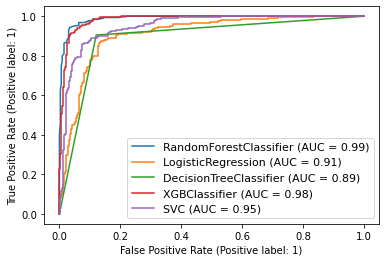

In [114]:
disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Model Saving

In [115]:
import pickle
filename = 'wine quality.pkl'
pickle.dump(lr,open(filename,'wb'))